Here are the various useful things:
NOAA API: https://www.ncei.noaa.gov/access/paleo-search/api

pyleoTUPS functions: https://github.com/LinkedEarth/PyleoTUPS/blob/main/pyleotups/core/Dataset.py

In [1]:
from pyleotups import Dataset
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from cartopy.io.shapereader import natural_earth, Reader
import matplotlib as mpl
import cartopy.io.shapereader as shpreader

C:\Users\georg\miniconda3\envs\paleo_ts\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


#### let's look for Australian lakes and plot their locations

In [2]:
# here's Australia, more or less
minlat = -45
maxlat = -10
minlon = 110
maxlon = 160

In [3]:
# initialise Dataset object
aus_lakes_ds = Dataset()

# get lakes (NOAA code 13) on the Australian continent
aus_lakes_ds.search_studies(max_lat=maxlat, min_lat=minlat, max_lon=maxlon, min_lon=minlon, data_type_id=13)

Parsing NOAA studies: 100%|██████████████████████| 21/21 [00:00<00:00, 317.08it/s]


,StudyID,XMLID,StudyName,DataType,EarliestYearBP,MostRecentYearBP,EarliestYearCE,MostRecentYearCE,StudyNotes,ScienceKeywords,Investigators,Publications,Sites,Funding
0,12203,10267,2000 Year Precipitation-Based Southern Oscilla...,CLIMATE RECONSTRUCTIONS,1900.0,-5.0,50.0,1955.0,Reconstruction of a precipitation-based Southe...,[Atmospheric and Oceanic Circulation Patterns ...,"Liguang Sun, Yuhong Wang, Wen Huang, Shican Qi...","[{'Author': 'Yan, H., L. Sun, Y. Wang, W. Huan...","[[{'DataTableID': '20526', 'DataTableName': 'S...",[{'fundingAgency': 'National Natural Science F...
1,22315,20388,2000 Year Tropical Rainfall Reconstructions,CLIMATE RECONSTRUCTIONS,2000.0,-50.0,-50.0,2000.0,Composite reconstruction of low latitude rainf...,[Precipitation Reconstruction],"Franziska Lechleitner, Sebastian Breitenbach, ...","[{'Author': 'Franziska A. Lechleitner, Sebasti...","[[{'DataTableID': '33444', 'DataTableName': 'L...","[{'fundingAgency': 'European Union', 'fundingG..."
2,22411,20588,"Blue Lake, South Australia 6,000 Year Ostracod...",PALEOLIMNOLOGY,5690.0,5.0,-3740.0,1945.0,"Ostracod geochemical (Mg/Ca, Sr/Ca, Na/Ca) and...",None,"Chris Gouramanis, Daniel Wilkins, Patrick De D...","[{'Author': 'Chris Gouramanis, Daniel Wilkins,...","[[{'DataTableID': '33534', 'DataTableName': 'B...",[]
3,20452,18259,"Duckhole Lake, Tasmania 950 Year Sediment Refl...",PALEOLIMNOLOGY,883.0,-58.0,1067.0,2008.0,"Sediment reflectance data (650-700 nm trough, ...",[Air Temperature Reconstruction],"Krystyna Saunders, Martin Grosjean, Dominic Ho...","[{'Author': 'KM Saunders, M Grosjean, DA Hodgs...","[[{'DataTableID': '31156', 'DataTableName': 'D...","[{'fundingAgency': 'European Union', 'fundingG..."
4,30799,72496,Eagle Tarn and Platypus Tarn Air Temperature R...,CLIMATE RECONSTRUCTIONS,15862.0,29.0,-13912.0,1921.0,This dataset was contributed as part of the Te...,[Air Temperature Reconstruction],"Andrew Rees, Les Cwynar","[{'Author': 'Kaufman, D., McKay, N., Routson, ...","[[{'DataTableID': '43353', 'DataTableName': 'E...",[]
5,20529,18345,Global Holocene Paleodust Database,LOESS AND PALEOSOL,12000.0,0.0,-10050.0,1950.0,Mineral dust data (dust mass accumulation rate...,None,Samuel Albani,"[{'Author': 'S. Albani, N.M. Mahowald, G. Winc...","[[{'DataTableID': '31279', 'DataTableName': 'A...",[{'fundingAgency': 'US National Science Founda...
6,5495,620,"Global Lake-Level Variations from 18,000 to 0 ...",LAKE LEVELS,20000.0,0.0,-18050.0,1950.0,Lake status determined at 1000-year intervals ...,"[hydrology, trends]","Frances Alayne Street-Perrott, None Marchand, ...","[{'Author': 'Street-Perrott, F.A., D.S. Marcha...","[[{'DataTableID': '8993', 'DataTableName': 'Ma...",[]
7,37158,78359,"Lake Barrine, Australia TOC and Itrax Data Ove...",PALEOLIMNOLOGY,18358.0,1445.0,-16408.0,505.0,"Provided Keywords: northeastern Australia, bul...","[Younger Dryas, Precipitation Reconstruction]","Michael Bird, Ting Li","[{'Author': 'Li, T., Wurster, C.M., Haig, J., ...","[[{'DataTableID': '49839', 'DataTableName': 'B...",[{'fundingAgency': 'Australian Research Counci...
8,38232,79380,"Lake Barrine, NE Australia brGDGT Data since 1...",PALEOLIMNOLOGY,18305.0,100.0,-16355.0,1850.0,BrGDGTs from surface and downcore sediments in...,None,"Michael Bird, Ting Li","[{'Author': 'Li, Ting, Rainy Comley, Enlou Zha...","[[{'DataTableID': '50805', 'DataTableName': 'B...",[{'fundingAgency': 'Australian Research Counci...
9,22430,20598,"Lake Keilambete, SE Australia Holocene Sedimen...",PALEOLIMNOLOGY,9550.0,-54.0,-7600.0,2004.0,Multiproxy Holocene sediment data and lake lev...,[hydrology],"Daniel Wilkins, Patrick De Deckker, L. Keith F...","[{'Author': 'Daniel Wilkins, Chris Gouramanis,...","[[{'DataTableID': '33555', 'DataTableName': 'K...",[{'fundingAgency': 'Australian Research Counci...


In [4]:
# geographical information associated with the returned studies (which include e.g., global compilations)
lakes_geo = aus_lakes_ds.get_geo()
lakes_geo.keys()

Index(['StudyID', 'DataType', 'SiteID', 'SiteName', 'LocationName', 'Latitude',
       'Longitude', 'MinElevation', 'MaxElevation'],
      dtype='object')

In [5]:
# the data tables
lakes_dat = aus_lakes_ds.get_tables()
lakes_dat.keys()

Index(['DataTableID', 'DataTableName', 'TimeUnit', 'FileURL', 'Variables',
       'FileDescription', 'TotalFilesAvailable', 'SiteID', 'SiteName',
       'LocationName', 'Latitude', 'Longitude', 'MinElevation', 'MaxElevation',
       'StudyID', 'StudyName'],
      dtype='object')

In [6]:
# here ar ethe unique site names - definitely not all in Australia
print(set(lakes_dat['SiteName']))

{'Breek Been Kolk', 'Wonchi', 'Duck', 'Kunteyi', 'Klein Awas', 'Ahnet-Mouydir', 'Mouskorbe', 'Damascus', 'Tropics', 'Rosebud', 'Clovis', 'El Junco', 'Albacutya', 'Oukechert', 'Upper Lerma Basin', 'Erg Ine Sakane 57-19', 'Kepa', 'Ruby', 'Elk Island', 'Harney-Malheur', 'Zuni', 'Wallywash', 'Zharinanmuco', 'Pityoulish', 'Nabta', 'Sbeita', 'Comarum So', 'Marshes', 'Eagle Tarn', 'Lake Titicaca', 'George', 'Monahans Dunes', 'Wielkie Gacno', 'Jebel Aulia', 'Chenco', 'Bushmans Fountain', 'Bromfield', 'Chatyrkel', 'Qarat El Howeit', 'Patzcuaro', 'Qinghai', 'La Guitarra', 'Arch', 'Aozerkat', 'Begour', 'Ziway-Shala', 'Tysons', 'Seguedine', 'Leconte', 'Tassara', 'Ghadames', 'Zoo Baba', 'Kirchner', 'Adobe', 'Valencia', 'Lahontan', 'Carp', 'Palmyra', 'Poukawa', 'Hassi Messouad', 'Lake Chad', 'Lake Mobutu Sese Seko', 'Hassi Cheikh', 'Ichourad', 'Trou Au Natron', 'De Agua Sucia', 'Blue Lake SA', 'Hora', 'Victoria', 'Myalup', 'Rutz', 'Nefud As-sirr', 'El Bakht', 'Behar Belama', 'El Gobernador', 'Selima

In [7]:
# filter lakes_dat to only keep lats/lons in Australia

# convert to df
lakes_dat_df = pd.DataFrame(lakes_dat)

# these are stored as strings
lakes_dat_df['Latitude'] = pd.to_numeric(lakes_dat_df['Latitude'], errors='coerce')
lakes_dat_df['Longitude'] = pd.to_numeric(lakes_dat_df['Longitude'], errors='coerce')

# filter
lakes_dat_df = lakes_dat_df[
    (lakes_dat_df['Latitude'] >= minlat) & (lakes_dat_df['Latitude'] <= maxlat) &
    (lakes_dat_df['Longitude'] >= minlon) & (lakes_dat_df['Longitude'] <= maxlon)
]

### do the same for the geo info - maybe we'll need it? idk maybe not

lakes_geo_df = pd.DataFrame(lakes_geo)

lakes_geo_df['Latitude'] = pd.to_numeric(lakes_geo_df['Latitude'], errors='coerce')
lakes_geo_df['Longitude'] = pd.to_numeric(lakes_geo_df['Longitude'], errors='coerce')

lakes_geo_df = lakes_geo_df[
    (lakes_geo_df['Latitude'] >= minlat) & (lakes_geo_df['Latitude'] <= maxlat) &
    (lakes_geo_df['Longitude'] >= minlon) & (lakes_geo_df['Longitude'] <= maxlon)
]

In [8]:
# there's also an object for 'sites'
lake_sites = aus_lakes_ds.get_sites()
lake_sites_df = pd.DataFrame(lake_sites)

print(lakes_geo_df.shape)
print(lakes_dat_df.shape)
print(lake_sites_df.shape)

(52, 9)
(345, 16)
(2908, 16)


In [10]:
# filter the summary and site details according to the Australian lat/lon identified above
lakes_sum = aus_lakes_ds.get_summary()
lakes_sum_df = pd.DataFrame(lakes_sum)

studyIDs = set(lakes_dat_df['StudyID'])

# filter to match the Australia-only lakes (filtering on site name)
lakes_sum_df = lakes_sum_df[lakes_sum_df['StudyID'].isin(studyIDs)]

# same with the site df
siteIDs = set(lakes_dat_df['SiteID'])
lake_sites_df = lake_sites_df[lake_sites_df['SiteID'].isin(siteIDs)]

In [11]:
print(lakes_sum_df.shape)
print(lake_sites_df.shape)

(14, 14)
(345, 16)


In [12]:
# add the record length information from the study summary to the data tables
# note that the lengths may not match the specific lengths of the actual records - these are from the *study* metadata
# a better way would be to read in the data table and extract the age column. But that would be...finicky. Unless it's always in the same place. 
# and there are issues with CE versus BP
# and certain rows don't seem to work e.g., index 11
# a problem for future georgy

# first, only keep unique instances of site name
unique_lakes = lake_sites_df.drop_duplicates(subset='SiteName', keep='first')
print(f"this many unique lakes: {unique_lakes.shape[0]}")

# now add length in the Common Era
lakes_sum_df['EarliestYearCE'] = pd.to_numeric(lakes_sum_df['EarliestYearCE'], errors='coerce')
lakes_sum_df['MostRecentYearCE'] = pd.to_numeric(lakes_sum_df['MostRecentYearCE'], errors='coerce')

# time info
time_info = lakes_sum_df[['EarliestYearCE', 'MostRecentYearCE', 'StudyID']]
time_info['EarliestYearCE'] = time_info['EarliestYearCE'].apply(lambda x: max(x, 0)) # replace pre-CE years with 0
time_info['length'] = time_info['MostRecentYearCE'] - time_info['EarliestYearCE']

# add to the unique lakes df
unique_lakes = unique_lakes.merge(time_info, on='StudyID', how='left')

this many unique lakes: 50


C:\Users\georg\AppData\Local\Temp\ipykernel_18372\3519982375.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_info['EarliestYearCE'] = time_info['EarliestYearCE'].apply(lambda x: max(x, 0)) # replace pre-CE years with 0
C:\Users\georg\AppData\Local\Temp\ipykernel_18372\3519982375.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_info['length'] = time_info['MostRecentYearCE'] - time_info['EarliestYearCE']


In [13]:
# some tidying - several of these are no longer accurate as the rows aren't linked to specific data tables
unique_lakes = unique_lakes[['SiteID', 'SiteName', 'Latitude', 'Longitude', 'MinElevation', 'MaxElevation', 'StudyID', 'StudyName', 'EarliestYearCE', 'MostRecentYearCE', 'length']]
unique_lakes['MinElevation'] = pd.to_numeric(unique_lakes['MinElevation'], errors='coerce')
unique_lakes['MaxElevation'] = pd.to_numeric(unique_lakes['MaxElevation'], errors='coerce')

unique_lakes['Latitude'] = pd.to_numeric(unique_lakes['Latitude'], errors='coerce')
unique_lakes['Longitude'] = pd.to_numeric(unique_lakes['Longitude'], errors='coerce')

I'd like to have coloured these by elevation but the elvation is recorded at study level - so they're basically all the same (and don't refelct the actual lake locations)

In [14]:
# now plot the lake locations

# get Australia outline
shpfilename = natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = Reader(shpfilename)
australia_geom = [record.geometry for record in reader.records()
                  if record.attributes['NAME_LONG'] == 'Australia']

# recycle an old plotting function - handy if i want to add more maps later

def plot_sites(row, col, site_dat, dat_proj, new_proj, title, vmin, vmax,
                    cmap="RdBu", size_scale=15, show_title=True):
    
    ax = fig.add_subplot(gs[row, col], projection=new_proj)

    ax.set_extent([110, 155, -45, -10], crs=ccrs.PlateCarree())

    # Draw Australia
    ax.add_geometries(australia_geom, crs=ccrs.PlateCarree(),
                      edgecolor='black', facecolor='none', linewidth=0.5)

    # Overlay points
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    cmap_instance = cm.get_cmap(cmap)
    sizes = np.sqrt(site_dat['length']) * size_scale
    sc = ax.scatter(site_dat['Longitude'], site_dat['Latitude'], c=site_dat['length'],
                    cmap=cmap_instance, norm=norm, transform=dat_proj,
                    edgecolor='k', s=sizes)

    if show_title:
        ax.set_title(title, fontname='Arial', color='black', fontsize=14)

    ax.axis('off')

    return sc

C:\Users\georg\AppData\Local\Temp\ipykernel_18372\1889036062.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_instance = cm.get_cmap(cmap)


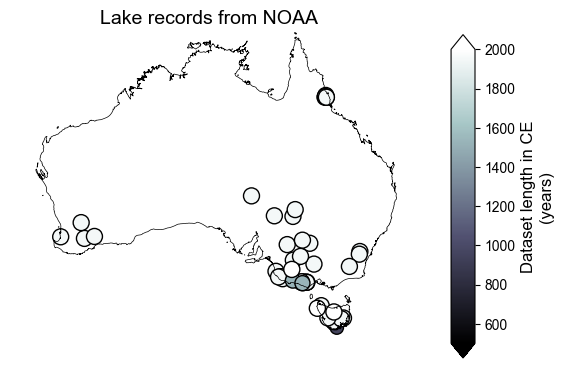

In [15]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,0.06], wspace=0.2)

dat_proj = new_proj = ccrs.PlateCarree()
cmap = "bone"

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'

vmin = 500
vmax = 2000

title = "Lake records from NOAA"
label = "Dataset length in CE\n(years)"

im = plot_sites(0, 0, unique_lakes, dat_proj, new_proj, title, vmin, vmax, cmap=cmap, size_scale=3, show_title=True)

cax = fig.add_subplot(gs[0, 1])
pos = cax.get_position()
cax.set_position([pos.x0, pos.y0 + 0.1, pos.width, pos.height * 0.7]) 
cbar = fig.colorbar(im, cax=cax, extend='both')
cbar.set_label(label, fontsize=12)